# ALERT Doctoral School 2023
## Hands-on Critic Algorithms for the Miner game
### Authors: Alexandros Stathas, Diego Gutierrez-Oribio, Ioannis Stefanou

In this code, you can train four Critic algorithms (Monte-Carlo, SARSA, Q-learning, and Q-learning with advantage) to solve the Miner game on a 4x4 grid.

#### Main Libraries

In [56]:
from Miner_v1 import Miner
from plotter import plot_env, plot_arrows 
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
np.set_printoptions(suppress = True)

#### Initialization of the Miner environment

In [57]:
env = Miner(desc=["FFFG", "FFFF", "FFFF", "HSFF"], is_slippery=False, render_mode="ansi")
env.reset()

num_states = env.observation_space.n
num_actions = env.action_space.n

(13, {'prob': 1})

#### Training hyperparameters

In [59]:
num_episodes = 1500
gamma = 0.99 # Discount factor
alpha = 0.1  # Running average hyperparameter
epsilon = 0.01  # Epsilon-greedy exploration
step_size = 12

### Monte-Carlo

In [60]:
Q = np.zeros((num_states, num_actions))

for episode in range(num_episodes):
    state = env.reset()[0]
    episode_states = []
    episode_actions = []
    episode_rewards = []

    done = False
    while not done:
        action = env.action_space.sample()  # Choose a random action
        next_state, reward, done, _ = env.step(action)[:4]
        episode_states.append(state)
        episode_actions.append(action)
        episode_rewards.append(reward)
        state = next_state

    G = 0  # Return (cumulative reward)
    for t in range(len(episode_states) - 1, -1, -1):
        G = gamma * G + episode_rewards[t]
        state = episode_states[t]
        action = episode_actions[t]
        
        # Update Q-value using a running average
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * G

optimal_policy = np.argmax(Q, axis=1)

#### Results

Final Q-values:
 [[ -6.01  -32.581  18.625 -30.922]
 [  4.019  20.805  60.088  14.241]
 [  6.365   5.73  100.     13.073]
 [  0.      0.      0.      0.   ]
 [-39.877 -20.363   5.863 -26.172]
 [  8.123 -14.111  31.808  38.934]
 [ 18.702  13.318  34.903  28.09 ]
 [  5.09   18.502  58.606 100.   ]
 [-38.002 -20.    -30.388 -33.958]
 [-33.585 -13.422  12.745  18.965]
 [ 12.697 -18.597  44.377  41.868]
 [ 45.446  -9.326 -14.899  42.818]
 [  0.      0.      0.      0.   ]
 [-20.     -1.173   8.022  10.444]
 [-15.755  -9.141  10.389   3.34 ]
 [  3.095  -0.567  -6.557  24.036]]


Optimal Policy:



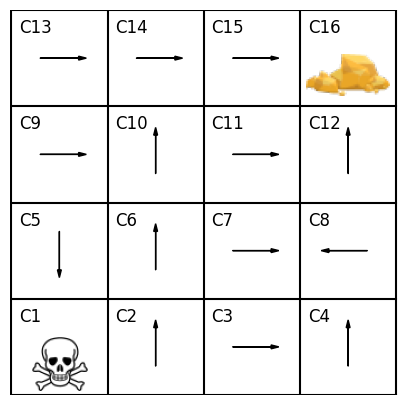

In [61]:
print("Final Q-values:\n", Q); print("\n")
print("Optimal Policy:\n")
game_actions_to_plotter_arrows = {'0': 2, '1': 1, '3':3, '2':4}
policy_arrow_compatible =np.array([game_actions_to_plotter_arrows[key] for key in np.array(optimal_policy,dtype="<U3")],dtype=np.int32)
policy_arrow_compatible=policy_arrow_compatible.reshape((-1,4))[::-1,:].reshape((16))
M=4;Lx=5;Ly=5
fig, ax = plt.subplots()
plot_env(fig,ax,M,Lx,Ly)
plot_arrows(fig,ax,policy_arrow_compatible,M,Lx,Ly)
plt.show()

In [62]:
def Dictionary(s):
    return optimal_policy[s]

#### Testing of your policy in the Miner game

In [63]:
# Create the Miner environment with custom map and no slipperiness
env_test = Miner(desc=["FFFG", "FFFF", "FFFF", "HSFF"], is_slippery=False, render_mode="human")
env_test.reset()

# Lists to store states, actions, rewards, and dones during the play
states = np.zeros(6)
states[0] = 13
actions, rewards, dones = [], [], []

def show_state(obs):
    # Render the environment using matplotlib
    env_test.render()
    # Pause for a short time to allow the plot to update
    plt.pause(0.01)

for index in range(5):
    action = Dictionary(int(states[index]))
    obs_tp1, rew, done, _ = env_test.step(action)[:4] 

    # Append the states, actions, rewards, and dones to the lists
    states[index+1]=obs_tp1
    actions.append(action)
    rewards.append(rew)
    dones.append(done)  

    # Show the updated state of the environment
    show_state(obs_tp1)

    if done == True:
        if rew > 0:
            print("Congratulations! You reached the gold!")
        else:
            print("Oops! You fell into a hole!")
            
# Print the information after the game ends
print("Total number of moves:", np.size(rewards))
print("Final reward:", int(sum(rewards)))
    
# Close the environment after finishing the game
env_test.close()

Congratulations! You reached the gold!
Total number of moves: 5
Final reward: 100


### SARSA (On-Policy TD Control)

In [64]:
Q = np.zeros((num_states, num_actions))
for episode in range(num_episodes):
    state = env.reset()[0]
    action = env.action_space.sample()  # Initial action

    done = False
    step=0
    while not done:
        step+=1
        if step==step_size:
            break

        if np.max(Q[state, :]) > 0:
            next_action = np.argmax(Q[state, :])  # Exploit
        else:
            next_action = env.action_space.sample()  # Explore
        
        next_state, reward, done, _ = env.step(next_action)[:4]
        
        # SARSA update
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
        
        state = next_state
        action = next_action
        
optimal_policy = np.argmax(Q, axis=1)

#### Results

Final Q-values:
 [[ -8.651   0.      0.    -11.404]
 [ -5.139   0.     -2.236  -0.099]
 [  0.      0.     14.794  16.931]
 [  0.      0.      0.      0.   ]
 [-13.636  -6.968   0.    -16.463]
 [ -0.015   1.224  -6.137  -3.898]
 [  0.     -0.784  12.912  19.389]
 [  0.      0.     10.627 100.   ]
 [-17.584 -15.728   0.      0.   ]
 [ -1.799   1.576 -10.814 -25.972]
 [ -2.033  -0.02   27.202  28.81 ]
 [  0.     -1.     60.033  98.433]
 [  0.      0.      0.      0.   ]
 [-23.041 -25.502 -21.53  -22.272]
 [  1.389  -3.757 -21.227   0.   ]
 [  0.     -0.545  -8.174   0.   ]]


Optimal Policy:



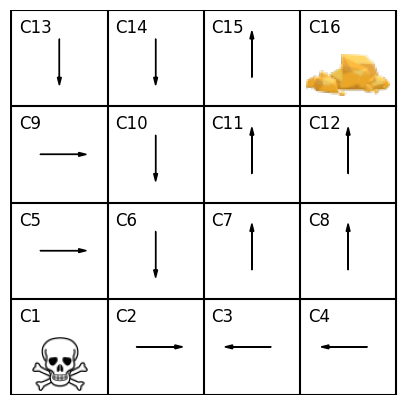

In [65]:
print("Final Q-values:\n", Q); print("\n")
print("Optimal Policy:\n")
game_actions_to_plotter_arrows = {'0': 2, '1': 1, '3':3, '2':4}
policy_arrow_compatible =np.array([game_actions_to_plotter_arrows[key] for key in np.array(optimal_policy,dtype="<U3")],dtype=np.int32)
policy_arrow_compatible=policy_arrow_compatible.reshape((-1,4))[::-1,:].reshape((16))
M=4;Lx=5;Ly=5
fig, ax = plt.subplots()
plot_env(fig,ax,M,Lx,Ly)
plot_arrows(fig,ax,policy_arrow_compatible,M,Lx,Ly)
plt.show()

#### Testing of your policy in the Miner game

In [67]:
# Create the Miner environment with custom map and no slipperiness
env_test = Miner(desc=["FFFG", "FFFF", "FFFF", "HSFF"], is_slippery=False, render_mode="human")
env_test.reset()

# Lists to store states, actions, rewards, and dones during the play
states = np.zeros(6)
states[0] = 13
actions, rewards, dones = [], [], []

def show_state(obs):
    # Render the environment using matplotlib
    env_test.render()
    # Pause for a short time to allow the plot to update
    plt.pause(0.01)

for index in range(5):
    action = Dictionary(int(states[index]))
    obs_tp1, rew, done, _ = env_test.step(action)[:4] 

    # Append the states, actions, rewards, and dones to the lists
    states[index+1]=obs_tp1
    actions.append(action)
    rewards.append(rew)
    dones.append(done)  

    # Show the updated state of the environment
    show_state(obs_tp1)

    if done == True:
        if rew > 0:
            print("Congratulations! You reached the gold!")
        else:
            print("Oops! You fell into a hole!")
            
# Print the information after the game ends
print("Total number of moves:", np.size(rewards))
print("Final reward:", int(sum(rewards)))
    
# Close the environment after finishing the game
env_test.close()

Total number of moves: 5
Final reward: 0


### Q-learning (Off-Policy TD Control)

In [68]:
Q = np.zeros((num_states, num_actions))
for episode in range(num_episodes):
    state = env.reset()[0]

    done = False
    step=0
    while not done:
        step+=1
        if step==step_size:
            break
            
        if np.max(Q[state, :]) > 0:
            action = np.argmax(Q[state, :])  # Exploit
        else:
            action = env.action_space.sample()  # Explore

        next_state, reward, done, _ = env.step(action)[:4]
        
        # Q-learning update
        max_next_action_value = np.max(Q[next_state, :])
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * max_next_action_value - Q[state, action])
        
        state = next_state

optimal_policy = np.argmax(Q, axis=1)

#### Results

Final Q-values:
 [[  0.      0.      0.      0.   ]
 [  0.      0.     99.     -1.9  ]
 [  0.      0.    100.     -1.   ]
 [  0.      0.      0.      0.   ]
 [ -1.9     0.      0.      0.   ]
 [  0.      0.      0.     98.01 ]
 [  0.      0.      0.99    0.   ]
 [  0.      0.     -1.     40.951]
 [ -1.9    -5.42    0.      0.   ]
 [  0.      0.      0.     97.03 ]
 [  0.      0.      0.433   0.   ]
 [  0.      0.     -1.      7.343]
 [  0.      0.      0.      0.   ]
 [-18.227  -9.657   0.     96.06 ]
 [  0.     -6.126   0.      0.   ]
 [  0.     -1.9    -2.71    0.186]]


Optimal Policy:



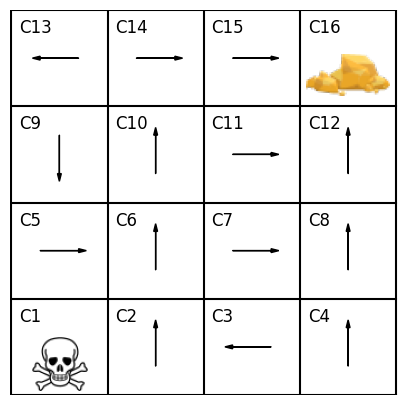

In [69]:
print("Final Q-values:\n", Q); print("\n")
print("Optimal Policy:\n")
game_actions_to_plotter_arrows = {'0': 2, '1': 1, '3':3, '2':4}
policy_arrow_compatible =np.array([game_actions_to_plotter_arrows[key] for key in np.array(optimal_policy,dtype="<U3")],dtype=np.int32)
policy_arrow_compatible=policy_arrow_compatible.reshape((-1,4))[::-1,:].reshape((16))
M=4;Lx=5;Ly=5
fig, ax = plt.subplots()
plot_env(fig,ax,M,Lx,Ly)
plot_arrows(fig,ax,policy_arrow_compatible,M,Lx,Ly)
plt.show()

#### Testing of your policy in the Miner game

In [70]:
# Create the Miner environment with custom map and no slipperiness
env_test = Miner(desc=["FFFG", "FFFF", "FFFF", "HSFF"], is_slippery=False, render_mode="human")
env_test.reset()

# Lists to store states, actions, rewards, and dones during the play
states = np.zeros(6)
states[0] = 13
actions, rewards, dones = [], [], []

def show_state(obs):
    # Render the environment using matplotlib
    env_test.render()
    # Pause for a short time to allow the plot to update
    plt.pause(0.01)

for index in range(5):
    action = Dictionary(int(states[index]))
    obs_tp1, rew, done, _ = env_test.step(action)[:4] 

    # Append the states, actions, rewards, and dones to the lists
    states[index+1]=obs_tp1
    actions.append(action)
    rewards.append(rew)
    dones.append(done)  

    # Show the updated state of the environment
    show_state(obs_tp1)

    if done == True:
        if rew > 0:
            print("Congratulations! You reached the gold!")
        else:
            print("Oops! You fell into a hole!")
            
# Print the information after the game ends
print("Total number of moves:", np.size(rewards))
print("Final reward:", int(sum(rewards)))
    
# Close the environment after finishing the game
env_test.close()

Congratulations! You reached the gold!
Total number of moves: 5
Final reward: 100


### Q-learning with advantage

In [71]:
Q = np.zeros((num_states, num_actions))

for episode in range(num_episodes):
    state = env.reset()[0]

    done = False
    step=0
    while not done:
        step+=1
        if step==step_size:
            break        
        if np.max(Q[state, :]) > 0:
            # Calculate the advantage using V-values
            state_value = np.max(Q[state, :])
            advantages = Q[state, :] - state_value
            action = np.argmax(advantages)  # Exploit using advantage
        else:
            action = env.action_space.sample()  # Explore

        next_state, reward, done, _ = env.step(action)[:4]
        
        # Q-learning update
        max_next_action_value = np.max(Q[next_state, :])
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * max_next_action_value - Q[state, action])
        
        state = next_state

optimal_policy = np.argmax(Q, axis=1)

#### Results

Final Q-values:
 [[ -1.      0.      0.     -1.9  ]
 [  0.      0.      2.772  -1.9  ]
 [  0.      0.     27.1     0.   ]
 [  0.      0.      0.      0.   ]
 [ -1.9     0.      0.      0.   ]
 [  0.      0.      0.      0.098]
 [  0.      0.      0.      0.   ]
 [  0.      0.     -2.71  100.   ]
 [ -2.71  -10.434   0.      0.   ]
 [  0.      0.     97.03    0.   ]
 [  0.      0.     98.01    0.   ]
 [  0.      0.     -1.     99.   ]
 [  0.      0.      0.      0.   ]
 [-19.237  -9.419   0.     96.06 ]
 [  0.     -7.712   0.      0.   ]
 [  0.     -9.015  -7.712   0.   ]]


Optimal Policy:



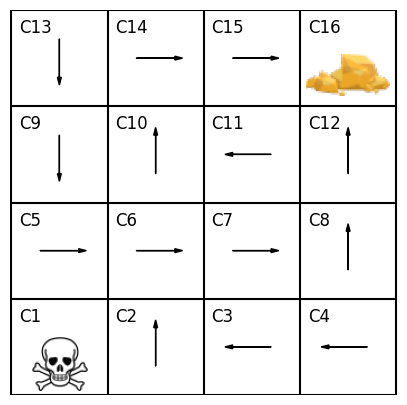

In [72]:
print("Final Q-values:\n", Q); print("\n")
print("Optimal Policy:\n")
game_actions_to_plotter_arrows = {'0': 2, '1': 1, '3':3, '2':4}
policy_arrow_compatible =np.array([game_actions_to_plotter_arrows[key] for key in np.array(optimal_policy,dtype="<U3")],dtype=np.int32)
policy_arrow_compatible=policy_arrow_compatible.reshape((-1,4))[::-1,:].reshape((16))
M=4;Lx=5;Ly=5
fig, ax = plt.subplots()
plot_env(fig,ax,M,Lx,Ly)
plot_arrows(fig,ax,policy_arrow_compatible,M,Lx,Ly)
plt.show()

#### Testing of your policy in the Miner game

In [73]:
# Create the Miner environment with custom map and no slipperiness
env_test = Miner(desc=["FFFG", "FFFF", "FFFF", "HSFF"], is_slippery=False, render_mode="human")
env_test.reset()

# Lists to store states, actions, rewards, and dones during the play
states = np.zeros(6)
states[0] = 13
actions, rewards, dones = [], [], []

def show_state(obs):
    # Render the environment using matplotlib
    env_test.render()
    # Pause for a short time to allow the plot to update
    plt.pause(0.01)

for index in range(5):
    action = Dictionary(int(states[index]))
    obs_tp1, rew, done, _ = env_test.step(action)[:4] 

    # Append the states, actions, rewards, and dones to the lists
    states[index+1]=obs_tp1
    actions.append(action)
    rewards.append(rew)
    dones.append(done)  

    # Show the updated state of the environment
    show_state(obs_tp1)

    if done == True:
        if rew > 0:
            print("Congratulations! You reached the gold!")
        else:
            print("Oops! You fell into a hole!")
            
# Print the information after the game ends
print("Total number of moves:", np.size(rewards))
print("Final reward:", int(sum(rewards)))
    
# Close the environment after finishing the game
env_test.close()

Congratulations! You reached the gold!
Total number of moves: 5
Final reward: 100
